#**Theoretical**

###**1. What is K-Nearest Neighbors (KNN) and how does it work?**

###Ans :-
  K-Nearest Neighbors (KNN) is a simple yet powerful non-parametric supervised learning algorithm used for both classification and regression tasks. Unlike many other machine learning algorithms, KNN is instance-based (lazy learning), meaning it doesn't explicitly learn a model during training but rather stores the entire training dataset.

**How it works:**
  - Storage Phase: The algorithm simply stores all the training data points with their corresponding labels/values.
  - Distance Calculation: When a new data point needs to be classified/predicted:
    - Calculate the distance between the new point and all points in the training set
    - Common distance metrics include Euclidean, Manhattan, or Minkowski
  - Neighbor Selection: Identify the k training samples that are closest to the new point (where k is a user-defined constant)
  - Prediction:
    - For classification: Take majority vote among the k neighbors
    - For regression: Take the average (or median) of the k neighbors' values

**Key Characteristics:**
  - No explicit training phase (makes it fast to "train" but slow to predict)
  - Highly dependent on the choice of k and distance metric
  - Can adapt easily to new training data
  - Becomes computationally expensive with large datasets.

###**2. What is the difference between KNN Classification and KNN Regression?**

###Ans :-
**KNN Classification:**
 -  Used for categorical/discrete target variables
 -  Prediction is made by majority voting among the k nearest neighbors
 -  For example, in a binary classification with k=5, if 3 neighbors are class A and 2 are class B, the new point is classified as class A
 -  Output is a class label
 -  Common evaluation metrics: accuracy, precision, recall, F1-score

**KNN Regression:**
  -  Used for continuous target variables
  -  Prediction is made by averaging (or sometimes taking median) of the k nearest neighbors' values
  -  For example, if k=3 neighbors have values 5, 7, and 9, the prediction would be (5+7+9)/3 = 7
  -  Output is a continuous value
  -  Common evaluation metrics: MSE, RMSE, MAE, R²

**Key Differences:**

  | Aspect	| KNN Classification	| KNN Regression  |
  |:---------|:---------------------|:-----------------|
  | Output type   | Class label   | Continuous value  |
  | Prediction    | Majority vote   | Average/median  |
  | Evaluation    | Accuracy, precision   | MSE, RMSE  |
  | Decision bound    | Class boundaries    | Regression surface  |


###**3. What is the role of the distance metric in KNN?**

###Ans :-
  The distance metric is fundamental to KNN as it determines how "similarity" between data points is quantified. The choice of distance metric significantly impacts the model's performance and the shape of its decision boundaries.

**Common Distance Metrics:**

  1.  Euclidean Distance:
    - The straight-line distance between two points
    - Formula: √(Σ(x_i - y_i)²)
    - Most commonly used default
    - Sensitive to magnitude differences between features (needs scaling)
  2.  Manhattan Distance:
    - Sum of absolute differences between coordinates
    - Formula: Σ|x_i - y_i|
    - Less sensitive to outliers than Euclidean
    - Works well with high-dimensional data
  3.  Minkowski Distance:
    - Generalized form (p=1: Manhattan, p=2: Euclidean)
    - Formula: (Σ|x_i - y_i|^p)^(1/p)
    - Allows tuning with parameter p
  4. Cosine Similarity:
    - Measures angle between vectors rather than magnitude
    - Useful for text/data where direction matters more than distance
    - Formula: (A·B)/(||A|| ||B||)

  **Role in KNN:**
  - Determines which points are considered "neighbors"
  - Affects the shape of decision boundaries
  - Different metrics may be appropriate for different data types:
    - Euclidean for physical/geometric data
    - Manhattan for grid-like paths or when dimensions aren't directly comparable
    - Cosine for text similarity or when magnitude isn't important
  
  **Choosing a Metric:**
  - Consider the nature of your data
  - Try different metrics and compare performance
  - Domain knowledge can guide selection
  - May need to normalize features first

###**4. What is the Curse of Dimensionality in KNN?**

###Ans :-
  The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that don't occur in low-dimensional settings. In KNN, this becomes particularly problematic because the algorithm relies on the concept of "neighborhoods" which becomes meaningless in high dimensions.

  **Key Aspects:**
  1. Data Sparsity:
    - As dimensions increase, data points become increasingly isolated
    - The volume of space grows exponentially with dimensions, so data becomes sparse
    - Even with large datasets, the effective sample size per dimension decreases
  2.  Distance Concentration:
    - All pairwise distances become similar
    - The ratio of nearest to farthest neighbor approaches 1
    - Makes the concept of "nearest neighbors" less meaningful
  3.  Empty Space Phenomenon:
    - Most of the volume in high-D space is empty
    - Points tend to lie on the edges of the space
    - The center becomes essentially empty

  **Impact on KNN :-**
  - Degraded classification/regression performance
  - Need for exponentially more data to maintain accuracy
  - Distance metrics become less discriminative
  - Computational costs increase without benefit


  **Visualization :-** Imagine filling a unit hypercube with data:
  - In 2D: Points are relatively close
  - In 100D: Even with millions of points, each is effectively alone

  
  **Mitigation Strategies :-**
  - Dimensionality reduction (PCA, feature selection)
  - Careful feature engineering
  - Using specialized distance metrics
  - Increasing k (but this reduces model flexibility)

###**5. How can we choose the best value of K in KNN?**

Ans :-
Selecting the optimal k value is crucial as it significantly impacts model performance. There are several methods to determine the best k:

  1.  Elbow Method:
    - Plot error rate (classification) or MSE (regression) against k values
    - Look for the point where the error stops decreasing significantly (the "elbow")
    - This represents a good trade-off between bias and variance

  2.  Cross-Validation:
    - Use k-fold cross-validation to evaluate different k values
    - Choose k with the best validation performance
    - Most reliable method but computationally expensive

  3.  Square Root Rule:
    - Simple heuristic: k ≈ √n where n is number of training samples
    - Provides a reasonable starting point

  4.  Domain Knowledge:
    - Sometimes business requirements suggest appropriate k
    - For example, in medical diagnosis, odd k might be preferred to avoid ties
  
  5.  Odd Number for Classification:
    - For binary classification, odd k prevents ties in voting
    - Common choices: 3, 5, 7, etc.

  **Considerations:**
  - Small k (e.g., 1):

    - Low bias but high variance
    - Captures noise, overfits
    - Complex decision boundaries

  - Large k:

    - Smoother decision boundaries
    - Higher bias but lower variance
    - May underfit by oversimplifying


  **Practical Approach:**

  1.  Start with a range of k values (e.g., 1-20)
  2.  Use cross-validation to evaluate each
  3.  Plot performance vs. k
  4.  Consider computational cost (larger k means slower prediction)
  5.  Consider class balance (in classification)

###**6. What are KD Tree and Ball Tree in KNN?**

Ans :- KD Tree and Ball Tree are data structures designed to make KNN searches more efficient by organizing the training data in ways that reduce the number of distance computations needed.

**KD Tree (k-dimensional Tree):**

  - A space-partitioning data structure for organizing points in k-dimensional space
  - Construction:
    - Recursively splits the space along data axes
    - Alternates between dimensions (typically choosing the dimension with greatest variance)
    - Splits at the median value to create balanced trees

  - Querying:
    - Traverse tree to find approximate nearest neighbors
    - Use branch-and-bound to prune unnecessary searches

  - Strengths:
    - Efficient for low-dimensional data (typically D < 20)
    - Construction: O(n log n)
    - Query: O(log n) in best case

  - Limitations:
    - Performance degrades in high dimensions
    - Becomes essentially brute force when D > 20

  - Ball Tree:
    - Recursively partitions data into nested hyper-spheres (balls)
    - Construction:
      - Finds centroid of points
      - Divides points into inner and outer balls
      - Recurses until leaves contain few enough points
    - Querying:
      - Uses triangle inequality to prune balls that can't contain nearest neighbors
    - Strengths:
      - Handles higher dimensions better than KD Tree
      - Works well with non-Euclidean metrics
      - More flexible partitioning
    - Limitations:
      - More expensive to construct than KD Tree
      - Still degrades in very high dimensions


  **Comparison:**


  | Feature   |   KD Tree |	  Ball Tree |
  | :------------- |  :------------------ | :---------------- |
  | Partitioning  |   Axis-aligned hyperplanes	|  Nested hyperspheres |
  | Best for	  |   Low dimensions (D < 20)	| Higher dimensions |
  | Metric support	| Euclidean best	| Works with many metrics |
  | Build time	| Faster	| Slower  |
  | Query time	| Faster for low D	| Better for high D |


###**7. When should you use KD Tree vs. Ball Tree?**

Ans :-
The choice between KD Tree and Ball Tree depends on several factors related to your dataset and problem characteristics:

  **Use KD Tree when:**

  1.  Low-dimensional data (typically < 20 features)
    - KD Tree excels when the number of dimensions is small
    - Its axis-aligned splits are effective in low-D spaces

  2.  Euclidean distance metric is appropriate
    - KD Tree is optimized for Euclidean distance
    - Can work with other Minkowski metrics but less efficient

  3.  Fast construction is needed
    - KD Trees are generally faster to build than Ball Trees
  
  4.  Memory is a concern
    - KD Trees typically use less memory than Ball Trees
  
  **Use Ball Tree when:**

  1.  Higher-dimensional data (typically > 20 features)
    - Ball Tree maintains efficiency longer as dimensions increase
  2.  Non-Euclidean metrics are needed
    - Works well with many distance metrics (e.g., Haversine, Manhattan)
    - More flexible metric support
  3.  Data has intrinsic dimensionality
    - Effective when data lies on a lower-dimensional manifold
  4.  Irregular cluster structure
    - Ball Tree's spherical partitions can better handle non-axis-aligned clusters

  **General Guidelines:**
  1.  Start with KD Tree for low-D data
  2.  Try Ball Tree if:
    - KD Tree performance is poor
    - Working with higher dimensions
    - Need non-Euclidean metrics
  3.  For very high dimensions (D > 100), brute force may become competitive
  4.  Always compare performance with cross-validation

  **Practical Considerations:**   
  - In scikit-learn, you can specify algorithm='auto' to let the library choose
  - For text data (often high-D), Ball Tree may be better
  - For geographic data, Ball Tree with Haversine metric works well

###**8. What are the disadvantages of KNN?**

Ans :-
While KNN is simple and intuitive, it has several significant disadvantages:

  1.  Computational Complexity:
    - No training time, but prediction is expensive (O(nd) for each prediction)
    - Becomes prohibitive with large datasets
    - Requires storing entire training set (memory intensive)

  2.  Curse of Dimensionality:
    - Performance degrades rapidly with increasing features
    - Distance measures become less meaningful in high-D spaces

  3.  Sensitive to Irrelevant Features:
    - All features contribute equally to distance by default
    - No automatic feature weighting
    - Requires careful feature selection/engineering

  4.  Optimal k Selection:
    - Choosing k requires experimentation/cross-validation
    - Small k leads to noisy models, large k leads to oversmoothing

  5.  Distance Metric Sensitivity:
    - Performance heavily depends on appropriate distance metric
    - Different metrics may be needed for different features

  6.  Class Imbalance Problems:
    - Majority classes can dominate voting in classification
    - Requires techniques like weighted voting or sampling

  7.  Missing Value Sensitivity:
    - Most distance metrics can't handle missing values directly
    - Requires imputation or special handling

  8.  Scale Sensitivity:
    - Features on larger scales dominate distance calculations
    - Requires careful feature scaling/normalization

  9.  No Interpretable Model:
    - Doesn't provide insights about feature importance
    - "Black box" predictions without clear explanations
  
  10. Boundary Shape Limitations:
    - Decision boundaries are locally linear
    - Can't learn complex global structures well

  **Mitigation Strategies:**

  - Use KD-trees/Ball-trees for faster search
  - Apply dimensionality reduction
  - Use feature selection/scaling
  - Implement weighted voting/distance
  - Use approximate nearest neighbors for large datasets

###**9. How does feature scaling affect KNN?**

Ans :- Feature scaling is crucial for KNN because it's a distance-based algorithm. The scale of features directly impacts distance calculations, and thus model performance.

  **Effects of Feature Scaling:**
  1.  Equal Feature Contribution:
    - Without scaling, features with larger ranges dominate distance calculations
    - For example, if Feature A ranges 0-1 and Feature B ranges 0-1000, Feature B will dominate
    - Scaling ensures all features contribute equally

  2.  Distance Metric Validity:
    - Distance metrics assume all dimensions are equally important
    - Unscaled data violates this assumption
    - Makes distance measurements meaningless

  3.  Improved Performance:
    - Proper scaling typically improves accuracy
    - Prevents bias toward certain features
    - Especially important for mixed data types (age vs. salary vs. percentages)

  **Common Scaling Methods:**
  1.  Standardization (Z-score normalization):
    - Transforms features to have μ=0, σ=1
    - Formula: (x - μ)/σ
    - Works well when data is roughly normally distributed
    - Less sensitive to outliers than min-max

  2.  Min-Max Scaling:
    - Scales features to a fixed range (typically [0,1])
    - Formula: (x - min)/(max - min)
    - Sensitive to outliers
    - Preserves original distribution shape

  3.  Robust Scaling:
    - Uses median and IQR instead of mean/std
    - More resistant to outliers
    - Formula: (x - median)/IQR

  **Impact on KNN:**

  - Without scaling:
    - Features on larger scales dominate
    - Distance measurements are skewed
    - Poor model performance
    - Misleading neighbor selection

  - With proper scaling:
    - All features contribute appropriately
    - Distance metrics work as intended
    - Better model performance
    - More meaningful neighbor selection

  - Practical Considerations:
    - Always scale features before applying KNN
    - Scale using training set statistics only (then apply same scaling to test set)
    - Choose scaling method based on data distribution
    - Be consistent with scaling across all features

###**10. What is PCA (Principal Component Analysis)?**

Ans :- Principal Component Analysis (PCA) is a fundamental unsupervised linear dimensionality reduction technique that projects data to a lower-dimensional space while preserving as much variance as possible.

  **Key Characteristics:**
   
  - Linear transformation technique
  - Unsupervised (doesn't use label information)
  - Creates new orthogonal features (principal components)
  - Orders components by variance explained
  - Commonly used for:
    - Dimensionality reduction
    - Data visualization
    - Noise reduction
    - Feature extraction


  **Core Concepts:**

  1.  Principal Components:
    - New uncorrelated variables
    - Linear combinations of original features
    - Ordered by variance explained (PC1 explains most variance)
  2.  Eigenvalues and Eigenvectors:
    - Eigenvectors determine directions of new feature space
    - Eigenvalues indicate variance explained by each PC
  3.  Explained Variance:
    - Percentage of total variance captured by each PC
    - Helps decide how many components to keep

  **Geometric Interpretation:**
  
  **PCA can be viewed as:**
  1.  Centering the data at the origin
  2.  Fitting an ellipsoid to the data
  3.  Rotating axes to align with ellipsoid's major axes
  4.  Keeping only the longest axes (most variance)

  **Mathematical Foundation:**
  1.  Standardize the data (mean=0, variance=1)
  2.  Compute covariance matrix (relationships between features)
  3.  Calculate eigenvalues and eigenvectors of covariance matrix
  4.  Sort eigenvectors by eigenvalues (descending)
  5.  Select top k eigenvectors (principal components)
  6.  Project data onto new subspace (matrix multiplication)

  **Applications:**
  1.  Visualization of high-D data
  2.  Preprocessing for other ML algorithms
  3.  Noise reduction (discarding low-variance components)
  4.  Feature extraction for models that can't handle high-D data
  6.  Multicollinearity removal in regression

  **Advantages:**
  1.  Reduces dimensionality while preserving information
  2.  Removes correlated features
  3.  Can improve model performance
  4.  Helps visualize complex data
  5.  Computationally efficient

###**11. How does PCA work?**

Ans :-
  PCA works through a series of mathematical transformations to identify the directions of maximum variance in high-dimensional data and project the data onto a lower-dimensional subspace. Here's the detailed step-by-step process:

  **Step 1: Standardization**
  - Center the data by subtracting the mean of each feature
  -	Scale each feature to unit variance (optional but recommended)
  -	Ensures all features contribute equally to variance calculations


  **Step 2: Covariance Matrix Computation**  
  -	Calculate the covariance matrix of the standardized data
  -	Covariance shows how features vary together
  -	Matrix will be d×d where d is original dimension
  

  **Step 3: Eigen Decomposition**
  -	Compute eigenvalues and eigenvectors of the covariance matrix
  -	Eigenvectors represent principal directions
  -	Eigenvalues represent variance along those directions
  
  
  **Step 4: Sort Components**
  -	Sort eigenvectors by decreasing eigenvalues
  -	The eigenvector with highest eigenvalue is first principal component (PC1)
  
  
  **Step 5: Select Subset**
  -	Choose top k eigenvectors based on:
    -	Desired explained variance (e.g., 95%)
    -	Specific number of components needed
    -	Eigenvalue cutoff (e.g., Kaiser criterion)
  
  
  **Step 6: Project Data**
  -	Create projection matrix from selected eigenvectors
  -	Transform original data via matrix multiplication: X_new = X_std × W
  -	Where W is matrix of selected eigenvectors
  
  
  **Mathematical Formulation:**
  1.	Given data matrix X (n samples × d features)
  2.	Standardize: Z = (X - μ)/σ
  3.	Compute covariance: C = (ZᵀZ)/(n-1)
  4.	Eigen decomposition: CV = VΛ
    -	V contains eigenvectors (columns)
    -	Λ diagonal matrix of eigenvalues
  5.	Select top k columns of V → V_k
  6.	Project: T = ZV_k (new n × k feature matrix)
  

  **Key Properties:**
  -	PCs are orthogonal (uncorrelated)
  -	PC1 captures maximum possible variance
  -	Subsequent PCs capture remaining variance under orthogonality constraint
  -	Total variance = sum of eigenvalues
  -	Fraction of variance explained by PCi = λ_i / Σλ

###**12. What is the geometric intuition behind PCA?**

Ans :-

The geometric intuition behind PCA involves visualizing how high-dimensional data can be rotated and projected to reveal its most important dimensions of variation.

**Geometric Interpretation:**
  1.	Data as Point Cloud:
    -	Imagine data points in a high-dimensional space
    -	Forms a "cloud" with certain orientation and spread
  2.	Center the Data:
    -	Shift the cloud to be centered at origin (mean subtraction)
    -	Doesn't change shape, just position
  3.	Find Directions of Spread:
    -	Identify axes along which data is most spread out
    -	First PC: direction of maximum variance
    -	Subsequent PCs: orthogonal directions of next highest variance
  4.	Ellipsoid Fitting:
    -	Imagine fitting an ellipsoid (multi-D ellipse) to the data
    -	Principal components align with ellipsoid's major axes
    -	Axis lengths proportional to variance in those directions
  5.	Rotation:
    -	Rotate coordinate system to align with principal axes
    -	New coordinates are principal components
    -	Lengths (variances) are eigenvalues

**Visualization in 2D:**

Imagine a 2D dataset with:
  -	Points roughly forming an elongated ellipse
  -	Original x/y axes not aligned with ellipse
  -	PCA would:
    1.	Center the ellipse at origin
    2.	Find major axis (PC1) along length of ellipse
    3.	Minor axis (PC2) perpendicular to PC1
    4.	Rotate coordinates to align with these axes

Higher Dimensions:
  -	In 3D: Like fitting a football (ellipsoid) to data
  -	In n-D: Same concept but harder to visualize
  -	Each PC is orthogonal to others and captures next highest variance

Key Insights:
  -	PCA finds the "natural" axes of the data
  -	Discards directions with little variation (often noise)
  -	Preserves most information in fewer dimensions
  -	Like viewing a 3D object from its most informative 2D angle

Example:
Consider human body measurements:
  -	Original features: height, weight, foot size, etc.
  -	PC1 might capture "overall size" (all measurements increase together)
  -	PC2 might capture "shape" (tall/thin vs. short/heavy)
  -	Lower PCs capture more subtle variations



###**13. What is the difference between Feature Selection and Feature Extraction?**

Ans :- Feature Selection and Feature Extraction are both dimensionality reduction techniques, but they work in fundamentally different ways:

Feature Selection:
-	Chooses a subset of the original features
-	Preserves original feature meanings
-	Methods include:
  -	Filter methods (select based on statistical measures)
  -	Wrapper methods (use model performance to select)
  -	Embedded methods (built into model training)

Feature Extraction:
-	Creates new features from original ones
-	New features are combinations/transformations of originals
-	Original features may be discarded
-	Methods include:
  -	PCA (linear combinations)
  -	LDA (linear combinations for class separation)
  -	Autoencoders (non-linear transformations)

Key Differences:

| Aspect	| Feature Selection |	Feature Extraction  |
| :---------------- | :------------------  | :-------------------------  |
| Output features	| Subset of originals	| New transformed features  |
| Interpretability  |	High (original features)  |	Low (new combinations)  |
| Information loss	| Discards entire features	| Preserves info in combos  |
| Methods	| Statistical tests, models	| PCA, LDA, autoencoders  |
| Computation	| Generally simpler	| Often more complex  |
| Use case	| When original features meaningful	| When relationships between features important|

When to Use Which:
-	Use Feature Selection when:
  -	Interpretability is important
  -	Many features are irrelevant/noisy
  -	You want to identify important original features
-	Use Feature Extraction when:
  -	Features are highly correlated
  -	You suspect lower-dimensional structure
  -	Original features less interpretable anyway
  -	Need maximum information preservation

Examples:
-	Feature Selection:
  -	In medical diagnosis, selecting only relevant biomarkers
  -	In text classification, keeping only most informative words
-	Feature Extraction:
  -	Image compression using PCA
  -	Voice recognition using MFCC features
  -	Topic modeling using LDA

###**14. What are Eigenvalues and Eigenvectors in PCA?**

Ans :- Eigenvalues and eigenvectors are fundamental mathematical concepts that form the core of PCA's operation.

Eigenvectors in PCA:
  -	Represent the principal directions of variance in the data
  -	Each eigenvector defines a principal component axis
  -	Are orthogonal (perpendicular) to each other in the feature space
  -	Unit vectors (length = 1)
  -	Indicate "loadings" - how original features contribute to PCs

Eigenvalues in PCA:
  -	Scalar values associated with each eigenvector
  -	Represent the amount of variance explained by each PC
  -	Larger eigenvalue = more variance captured by that PC
  -	Sum of eigenvalues equals total variance in data

Mathematical Definition:
  
  For a square matrix A, an eigenvector v and eigenvalue λ satisfy:
  Av = λv

In PCA:
  -	A is the covariance matrix of standardized data
  -	Eigenvectors are directions of maximum variance
  -	Eigenvalues are variances along those directions

PCA Interpretation:
  1.	Covariance matrix C captures feature relationships
  2.	Eigenvector v of C gives a direction where:
    -	Data projection has maximum variance
    -	This variance equals eigenvalue λ
  3.	Next eigenvector gives direction of max remaining variance orthogonal to previous ones

Practical Significance:
  -	Eigenvectors:
    -	Define new coordinate system for transformed data
    -	Columns of transformation matrix
    -	Show how original features combine to form PCs
  -	Eigenvalues:
    -	Determine importance of each PC
    -	Used to decide how many components to keep
    -	Proportion of variance explained: λ_i / Σλ

**Example:**

For a 2D dataset:
  -	PC1 eigenvector points along direction of greatest spread
  -	PC2 eigenvector orthogonal to PC1
  -	λ1 > λ2 indicates more variance along PC1

Computation:
  1.	Standardize data → Z
  2.	Compute covariance: C = (ZᵀZ)/(n-1)
  3.	Solve eigenproblem: Cv = λv
  4.	Sort (v_i, λ_i) pairs by decreasing λ_i

Key Properties:
  -	Eigenvectors form basis for new space
  -	Eigenvalues indicate variance distribution
  -	Relative eigenvalues show component importance
  -	Eigenvector signs are arbitrary (direction doesn't matter)


###**15. How do you decide the number of components to keep in PCA?**

Ans :-

Choosing the optimal number of principal components is crucial to balance dimensionality reduction with information preservation. Here are the primary methods:

  1.	Explained Variance Threshold:
    -	Keep enough components to explain a set percentage of total variance (e.g., 95%)
    -	Calculate cumulative explained variance ratio
    -	Find smallest k where Σ(λ₁ to λₖ)/Σ(λ₁ to λₙ) ≥ threshold
  2.	Scree Plot (Elbow Method):
    -	Plot eigenvalues in descending order
    -	Look for "elbow" where eigenvalues drop sharply then level off
    -	Keep components before the elbow
  3.	Kaiser Criterion:
    -	Keep components with eigenvalues > 1 (for standardized data)
    -	Based on idea that eigenvalue > 1 means component explains more than one original variable
  4.	Cross-Validation:
    -	Use PCA in pipeline with downstream task
    -	Choose k that gives best validation performance
    -	Computationally expensive but most practical
  5.	Fixed Number:
    -	Choose based on external constraints (e.g., visualization needs 2-3 components)
    -	Or based on computational limits

**Detailed Explanation:**

**Explained Variance Method:**
  1.	Compute PCA with all components
  2.	Calculate explained variance ratio for each component
  3.	Calculate cumulative sum
  4.	Find smallest k where cumulative variance ≥ threshold (commonly 0.95)
  5.	Example:
    -	PC1: 60%, PC2: 30%, PC3: 5%, PC4: 3%, etc.
    -	For 95% threshold, keep first 3 (60+30+5=95%)

**Scree Plot Approach:**
  1.	Plot eigenvalues in order (scree plot)
  2.	Look for point where slope becomes less steep
  3.	Intuition: components after elbow contribute little
  4.	Subjective but often effective

**Kaiser Criterion:**
  1.	Standardize data first (mean=0, var=1)
  2.	Eigenvalue > 1 means component explains more than one original variable
  3.	Conservative approach, often keeps too many

**Practical Considerations:**
  -	For visualization: typically 2-3 components
  -	For preprocessing: use variance threshold or cross-validation
  -	Balance between:
    -	Dimensionality reduction
    -	Information preservation
    -	Computational efficiency
    -	Downstream task performance

Example in Python:

  ```
  pca = PCA().fit(X)
  cum_var = np.cumsum(pca.explained_variance_ratio_)
  n_components = np.argmax(cum_var >= 0.95) + 1
  ```

###**16. Can PCA be used for classification?**

Ans :- PCA itself is not a classification algorithm, but it can be effectively used as a preprocessing step to enhance classification performance. Here's how PCA relates to classification:

  PCA's Role in Classification:
    
  1.	Dimensionality Reduction:
    -	Reduces number of features while preserving variance
    -	Helps classifiers that suffer from curse of dimensionality
  2.	Noise Reduction:
    -	Discarding low-variance components often removes noise
    -	Can improve classification accuracy
  3.	Visualization:
    -	Projecting to 2D/3D helps understand class separability
    -	Guides choice of classification approach
  4.	Multicollinearity Removal:
    -	Creates orthogonal features (uncorrelated)
    -	Benefits models like logistic regression
  
  How to Use PCA for Classification:
  1.	Preprocessing Pipeline:
    -	Standardize data
    -	Apply PCA to reduce dimensions
    -	Train classifier on reduced data
  2.	Feature Extraction:
    -	Use PCs as new features
    -	Often better than original features when highly correlated
  
  Limitations:
    -	PCA is unsupervised - ignores class labels
    -	Directions of max variance may not align with class separation
    -	For labeled data, LDA may be better (maximizes class separation)
    
  When PCA Helps Classification:
    -	High-dimensional data
    -	Features are correlated
    -	Many irrelevant/redundant features
    -	Small sample size relative to features
    
  When PCA May Hurt Classification:
    -	Discriminative information is in low-variance directions
    -	Classes are separated by combinations PCA doesn't capture
    -	Non-linear relationships between features
    
  Example Workflow:
    1.	Split data into train/test
    2.	Standardize using training stats
    3.	Fit PCA to training data
    4.	Transform both train and test
    5.	Train classifier on transformed data
    6.	Evaluate performance
    
  Alternative:

  For supervised dimensionality reduction, consider:
    -	Linear Discriminant Analysis (LDA)
    -	Partial Least Squares (PLS)
    -	Neural network autoencoders

###**17. What are the limitations of PCA?**

Ans :- While PCA is powerful, it has several important limitations to consider:

  1.	Linear Assumptions:
    -	Only captures linear relationships
    -	Fails with non-linear data structures
    -	Alternatives: Kernel PCA, t-SNE, UMAP
  2.	Variance ≠ Importance:
    -	Directions of max variance may not be most discriminative
    -	Might discard low-variance but informative features
  3.	Interpretability Loss:
    -	Principal components are linear combinations of original features
    -	Hard to interpret compared to original variables
  4.	Scaling Sensitivity:
    -	Requires features to be on similar scales
    -	Sensitive to outliers which affect variance calculations
  5.	Orthogonality Constraint:
    -	Forces components to be uncorrelated
    -	May not match true data structure
  6.	Global Structure Only:
    -	Captures global variance structure
    -	May miss important local patterns
  7.	Mean-Centering:
    -	Based on mean-centered data
    -	Sensitive to mean estimation, especially with outliers
  8.	Dimensionality Limits:
    -	Computationally expensive for very high-D data
    -	Requires enough samples (n > p) for reliable covariance estimates
  9.	Information Loss:
    -	Any dimensionality reduction loses information
    -	Need to carefully choose number of components
  10.	Categorical Data:
    -	Designed for continuous variables
    -	Doesn't handle categorical data well without encoding
  
  Mitigation Strategies:
    -	For non-linear data: use Kernel PCA or manifold learning
    -	For interpretation: examine component loadings
    -	For scaling: robust scaling with median/IQR
    -	For outliers: robust PCA variants
    -	For categorical data: appropriate encoding first
  
  When Not to Use PCA:
    -	When interpretability of original features is crucial
    -	With non-linear relationships between features
    -	When class separation is in low-variance directions
    -	With categorical or mixed data types

###**18. How do KNN and PCA complement each other?**

Ans :- KNN and PCA can work together synergistically, with PCA often serving as a preprocessing step to enhance KNN's performance. Here's how they complement each other:

  How PCA Helps KNN:
  1.	Dimensionality Reduction:
    -	Reduces curse of dimensionality for KNN
    -	Makes distance calculations more meaningful
    -	Improves computational efficiency
  2.	Noise Reduction:
    -	Discards low-variance components (often noise)
    -	Leads to cleaner distance calculations
  3.	Feature Decorrelation:
    -	Creates orthogonal features
    -	Avoids redundant information in distance metrics
  4.	Improved Accuracy:
    -	In many cases, KNN performs better on PCA-transformed data
    -	Especially when original features are correlated
  5.	Visualization:
    -	PCA to 2D/3D helps set appropriate k values
    -	Allows visual inspection of neighborhood structures
  
  How KNN Benefits from PCA:
    -	Faster neighbor searches in reduced space
    -	More meaningful distance calculations
    -	Reduced storage requirements
    -	Better handling of multicollinearity
    -	Often improved classification/regression performance
  
  Typical Workflow:
    1.	Standardize data
    2.	Apply PCA to reduce dimensions
    3.	Train KNN on reduced data
    4.	Evaluate performance
  
  When This Combination Works Best:
    -	High-dimensional data
    -	Correlated features
    -	When computational efficiency is important
    -	When many features are irrelevant/redundant
  
  Potential Limitations:
    -	If discriminative information is in discarded PCs
    -	Non-linear relationships may be lost
    -	PCA's linearity may not match data structure
  
  Example Use Cases:
    -	Image classification with many pixel features
    -	Document classification with many words
    -	Genetic data with many correlated measurements
  
  Implementation Note:
  
  Always:
    1.	Split data first
    2.	Fit PCA on training data only
    3.	Transform both train and test sets
    4.	Then apply KNN

###**19. How does KNN handle missing values in a dataset?**

Ans :-  KNN itself doesn't have built-in missing value handling, so preprocessing is required. Here are the common approaches:
  1.	Imputation Before KNN:
    -	Mean/Median/Mode Imputation: Fill missing values with feature averages
    -	KNN Imputation: Use KNN to predict missing values based on other features
    -	Iterative Imputation: Model each feature with missing values as function of others
  2.	Distance Metric Adjustments:
    -	Modify distance calculation to ignore missing dimensions
    -	For example, use partial distance:
      -	Only compute over available features
      -	Scale by fraction of available dimensions
    -	Implemented in some KNN variants
  3.	Missing as Special Value:
    -	Treat missingness as its own category
    -	Only works if missingness is informative
  4.	Feature Masking:
    -	Add binary indicators for missingness
    -	Combine with imputed values
  
  KNN-Specific Challenges:
    -	Distance metrics typically require complete data
    -	Missing values in training data affect neighbor finding
    -	Missing values in new data affect distance to neighbors
  
  Best Practices:
  1.	For training data:
    -	Impute missing values before applying KNN
    -	KNN imputation often works well
    -	Consider whether missingness is informative
  2.	For new data:
    -	Apply same imputation as training
    -	Or use distance metrics that handle missingness
  3.	Evaluation:
    -	Use cross-validation with missing value handling in pipeline
    -	Don't evaluate on artificially imputed test sets
  
  Example with scikit-learn:

  ```
      from sklearn.impute import KNNImputer

      # Impute missing values
      imputer = KNNImputer(n_neighbors=5)
      X_imputed = imputer.fit_transform(X)

      # Then apply KNN
      knn = KNeighborsClassifier()
      knn.fit(X_imputed, y)
  ```

  Considerations:
    -	KNN imputation can be computationally expensive
    -	Simple imputation may distort distance calculations
    -	Evaluate impact on model performance
    -	Consider whether to include missingness indicators

###**20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**

Ans :- PCA and LDA are both linear transformation techniques but with fundamentally different objectives:

Key Differences:


| Aspect	| PCA	| LDA |
| :---------  | :---------------- | :-------------  |
| Type	| Unsupervised	| Supervised  |
| Objective	| Maximize variance	| Maximize class separation |
| Uses Labels	| No	| Yes |
| Output	| Orthogonal directions of variance	| Directions for class separation |
| Assumptions	| None about class distribution	| Gaussian classes with equal covariance  |
| Number of Components	| Up to original dimensions	| Up to (number of classes - 1) |
| Use Cases	| General dimensionality reduction, visualization	| Classification tasks, supervised DR |
| Performance	| Preserves global structure	| Optimized for classification  |
| Sensitivity	| Sensitive to scaling	| Less sensitive to scaling |

#**Practical**

###**21. Train a KNN Classifier on the Iris dataset and print model accuracy?**

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # You can change the number of neighbors (k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy}")


Accuracy of the KNN classifier: 1.0


###**22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE?**

In [5]:

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.29330225808523525


###**23. Train a KNN Classifier using different distance metrics and compare accuracy?**

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Distance metrics to compare
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in distance_metrics:
    # Initialize and train the KNN classifier with the current metric
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {metric} distance: {accuracy}")


Accuracy with euclidean distance: 1.0
Accuracy with manhattan distance: 1.0
Accuracy with chebyshev distance: 1.0
Accuracy with minkowski distance: 1.0


###**24. Train KNN Classifier with different K values and visualize decision boundaries?**

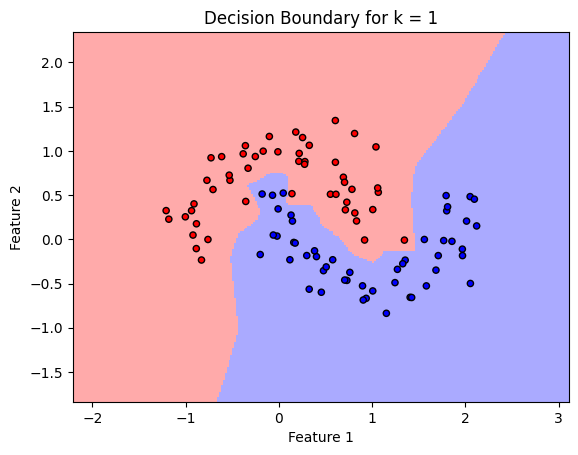

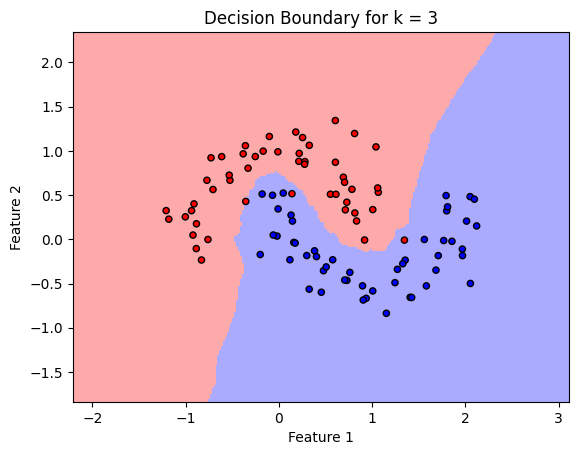

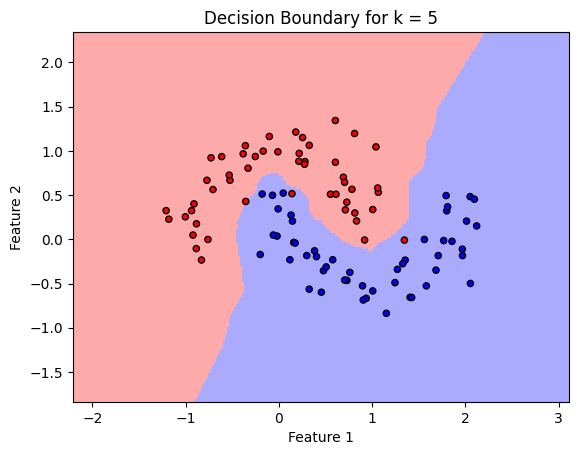

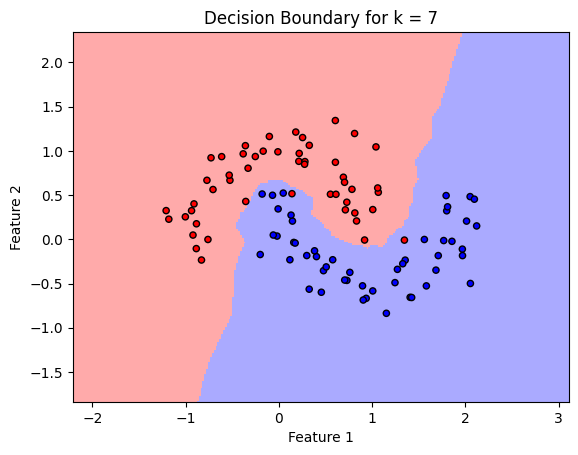

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data (moons dataset)
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a meshgrid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Test different k values
for k in [1, 3, 5, 7]:  # Example values for k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Decision Boundary for k = {k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.show()


###**25. Apply Feature Scaling before KNN and compare results?**

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier without scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without scaling: {accuracy_no_scaling}")

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled}")


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


###**26. Train PCA on synthetic data and print explained variance ratio?**

In [13]:
from sklearn.decomposition import PCA
import numpy as np

# Generate synthetic data (example)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Apply PCA
pca = PCA(n_components=2)  # Keep 2 principal components
pca.fit(X)

# Print explained variance ratio
pca.explained_variance_ratio_


array([0.26031601, 0.25248222])

###**27 Apply PCA before KNN Classifier and compare accuracy. ?**

In [14]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier without PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy_no_pca}")

# Apply PCA
pca = PCA(n_components=2) # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train the KNN classifier with PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca}")


Accuracy without PCA: 1.0
Accuracy with PCA: 1.0


###**28. Hyperparameter Tuning on KNN using GridSearchCV?**

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for k
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best hyperparameters:", test_accuracy)


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best accuracy: 0.9523809523809523
Test accuracy with best hyperparameters: 1.0


###**29. Train KNN Classifier and check misclassified samples?**

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Misclassified samples
misclassified = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified)}")
print("Indices of misclassified samples:", misclassified)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Number of misclassified samples: 0
Indices of misclassified samples: []

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


###**30. Train PCA model and visualize cumulative explained variance?**

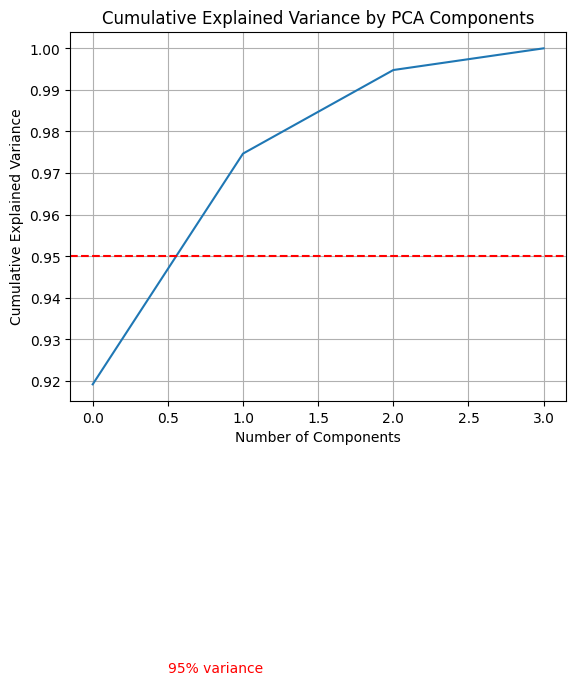

In [26]:
pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.85, '95% variance', color='red')
plt.grid()
plt.show()

###**31. Train KNN with different weights parameters?**

In [27]:
# Uniform weights (default)
knn_uni = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uni.fit(X_train, y_train)
acc_uni = accuracy_score(y_test, knn_uni.predict(X_test))

# Distance weights
knn_dist = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_dist.fit(X_train, y_train)
acc_dist = accuracy_score(y_test, knn_dist.predict(X_test))

print(f"Accuracy with uniform weights: {acc_uni:.2f}")
print(f"Accuracy with distance weights: {acc_dist:.2f}")

Accuracy with uniform weights: 1.00
Accuracy with distance weights: 1.00


###**32. Train KNN Regressor with different K values?**

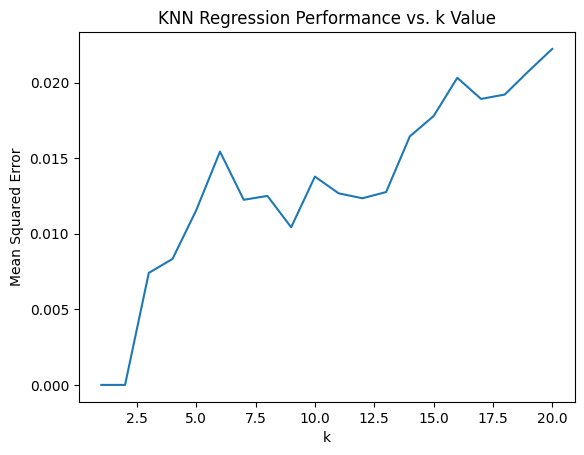

In [28]:
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.plot(k_values, mse_scores)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Performance vs. k Value')
plt.show()

###**33. Implement KNN Imputation for missing values?**

In [29]:
from sklearn.impute import KNNImputer

# Create data with missing values
X_missing = X.copy()
mask = np.random.rand(*X.shape) < 0.1  # 10% missing
X_missing[mask] = np.nan

# Impute using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_missing)

print("Original data with missing values:\n", X_missing[:5])
print("\nImputed data:\n", X_imputed[:5])

Original data with missing values:
 [[5.1 3.5 nan 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 nan 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Imputed data:
 [[5.1  3.5  1.46 0.2 ]
 [4.9  3.   1.4  0.2 ]
 [4.7  3.36 1.3  0.2 ]
 [4.6  3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]]


###**34. Visualize data projection onto first two PCs?**

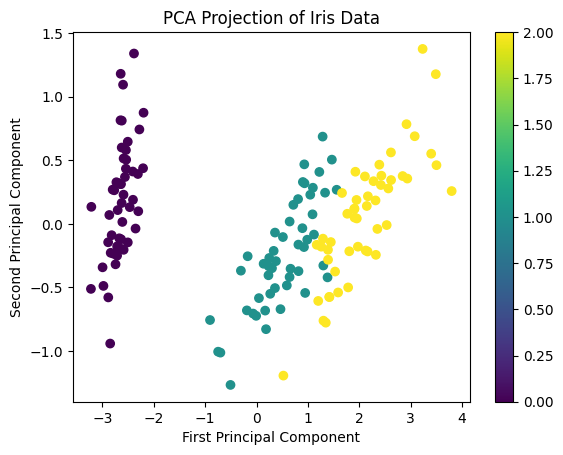

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection of Iris Data')
plt.colorbar()
plt.show()

###**35. Compare KD Tree vs Ball Tree algorithms?**

In [31]:
# KD Tree
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test))

# Ball Tree
knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test))

print(f"KD Tree Accuracy: {acc_kd:.2f}")
print(f"Ball Tree Accuracy: {acc_ball:.2f}")

KD Tree Accuracy: 1.00
Ball Tree Accuracy: 1.00


###**36. Visualize Scree plot for high-dimensional data?**

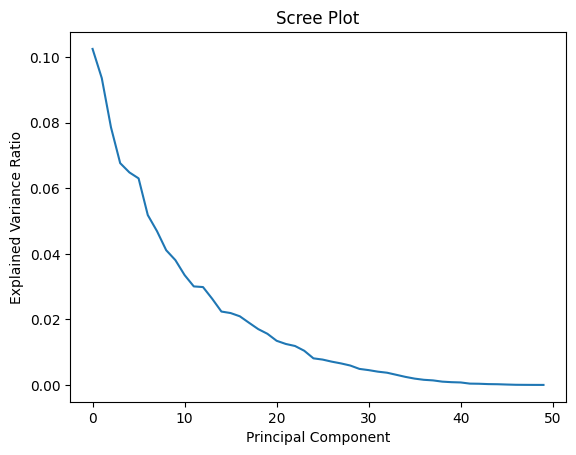

In [32]:
# Create high-dim data
X_high = np.random.randn(100, 50) @ np.random.randn(50, 50)

pca = PCA().fit(X_high)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

###**37. Evaluate KNN using Precision, Recall, F1-Score?**

In [36]:
from sklearn.metrics import classification_report

# Assuming you have already trained a KNN classifier (e.g., 'knn' from previous examples)
# and have predictions y_pred for the test data y_test

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



###**38. Analyze effect of PCA components on accuracy?**

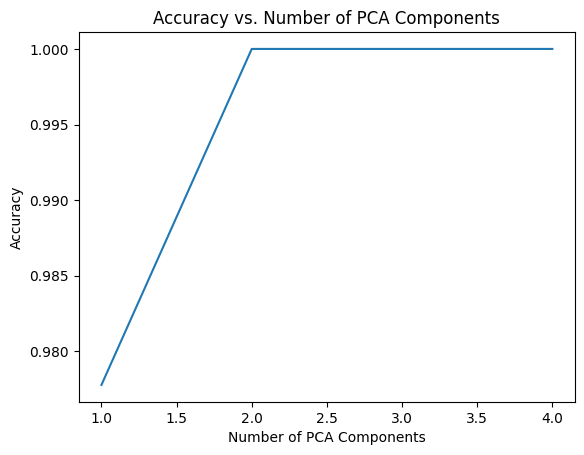

In [37]:
n_components = range(1, X_train.shape[1]+1)
acc_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    acc_scores.append(accuracy_score(y_test, knn.predict(X_test_pca)))

plt.plot(n_components, acc_scores)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.show()

###**39. Train KNN with different leaf_size values?**

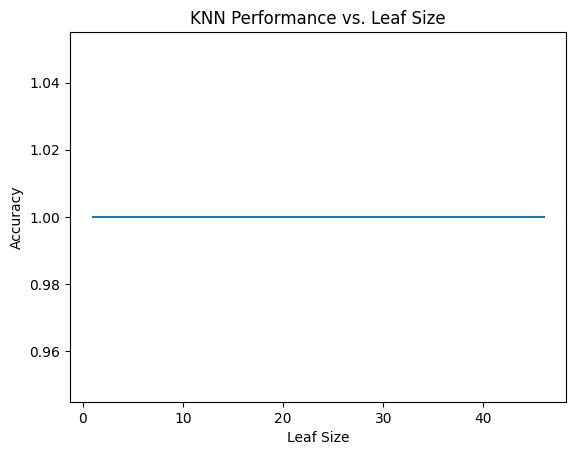

In [38]:
leaf_sizes = range(1, 51, 5)
acc_scores = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc_scores.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(leaf_sizes, acc_scores)
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs. Leaf Size')
plt.show()

###**40. Visualize data before and after PCA?**

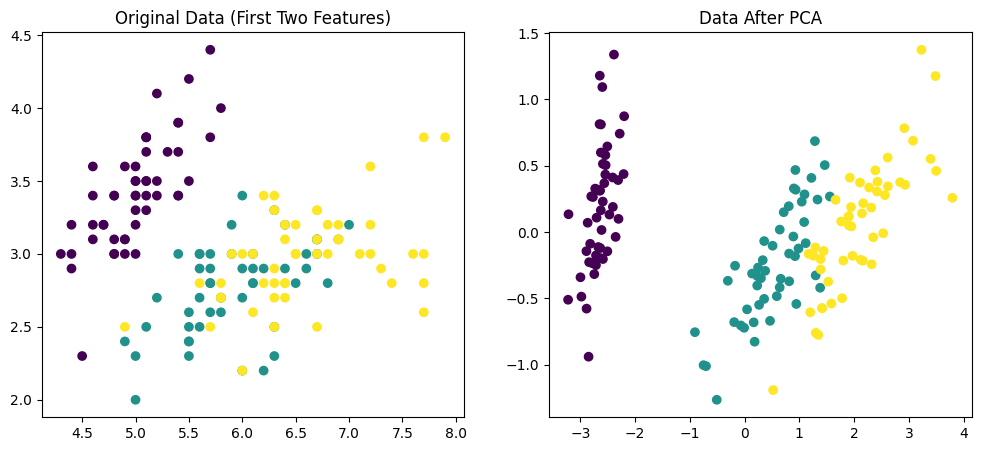

In [39]:
# Before PCA (first two features)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data (First Two Features)')

# After PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Data After PCA')
plt.show()

###**41. Train KNN on Wine dataset and print classification report?**

In [41]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



###**42. Analyze effect of distance metrics on KNN Regressor?**

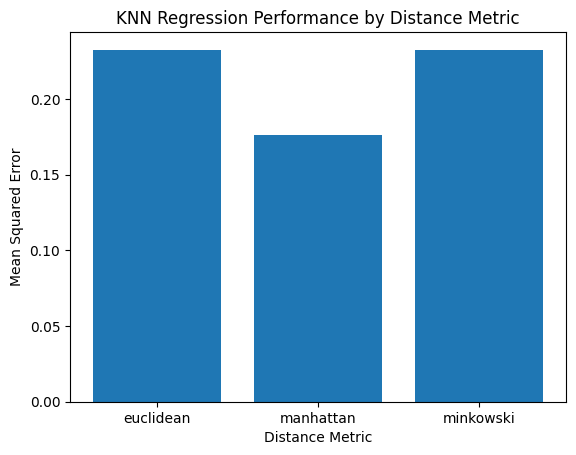

In [43]:
metrics = ['euclidean', 'manhattan', 'minkowski']
mse_scores = []

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.bar(metrics, mse_scores)
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Performance by Distance Metric')
plt.show()

###**43. Evaluate KNN using ROC-AUC score?**

In [54]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming you have a trained KNN classifier and predictions
# For multi-class problems, binarize the labels
# Fix: Specify all classes explicitly
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your actual class labels
y_pred_prob = knn.predict_proba(X_test)

# Compute ROC AUC for each class
# Fix: Iterate over classes and compute ROC AUC individually
roc_auc = []
for i in range(y_test_bin.shape[1]):
    # Fix: Access the i-th element of the y_pred_prob list instead of slicing
    roc_auc.append(roc_auc_score(y_test_bin[:, i], y_pred_prob[i][:, 1]))

# Average ROC AUC scores
avg_roc_auc = np.mean(roc_auc)

print(f"Average ROC-AUC Score: {avg_roc_auc}")

Average ROC-AUC Score: 1.0


###**44. Visualize variance captured by each PC?**

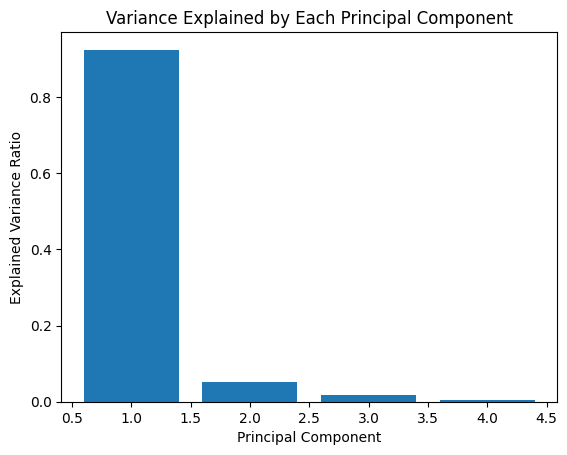

In [55]:
pca = PCA().fit(X)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()

###**45. Perform feature selection before KNN?**

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score


# Assuming X_train and y_train are your training data
# and y_train is currently one-hot encoded

# Convert one-hot encoded y_train to a 1D array of class labels
label_encoder = LabelEncoder()
y_train_1d = label_encoder.fit_transform(np.argmax(y_train, axis=1))

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train_1d)
X_test_selected = selector.transform(X_test)

# Train KNN on selected features
knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train_1d)

# Predict and evaluate
y_pred_selected = knn_selected.predict(X_test_selected)

# Fix: Convert y_pred_selected to one-hot encoding
y_pred_selected_onehot = label_binarize(y_pred_selected, classes=label_encoder.classes_)

# Fix: Use argmax to get class labels from y_test if it's one-hot encoded
y_test_1d = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

accuracy_selected = accuracy_score(y_test_1d, y_pred_selected)
print(f"Accuracy with feature selection: {accuracy_selected}")

Accuracy with feature selection: 1.0


###**46. Visualize data reconstruction error after PCA?**

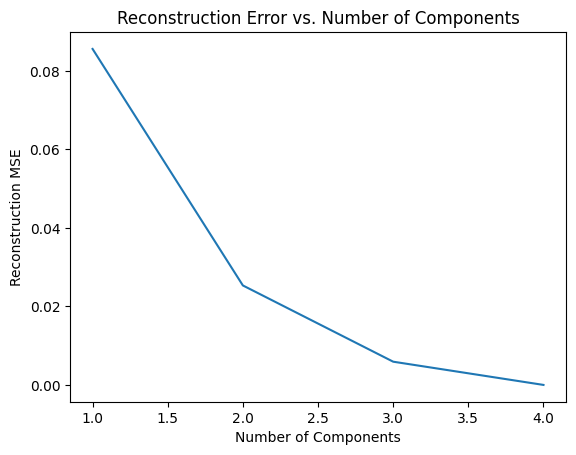

In [61]:
n_components = range(1, X.shape[1]+1)
mse = []

for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse.append(mean_squared_error(X, X_reconstructed))

plt.plot(n_components, mse)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction MSE')
plt.title('Reconstruction Error vs. Number of Components')
plt.show()

###**47. Visualize KNN decision boundary?**

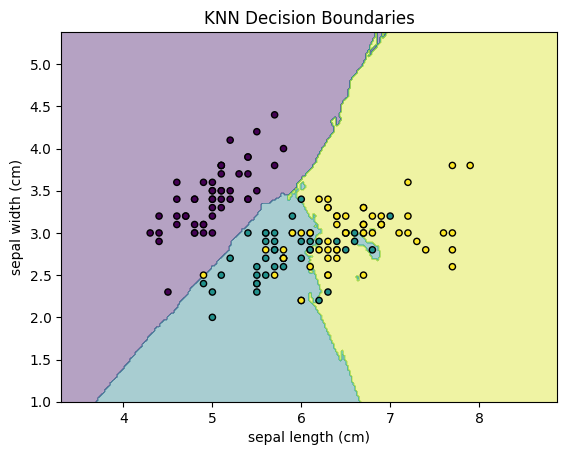

In [62]:
# Using first two features for visualization
X = iris.data[:, :2]
y = iris.target

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train and predict
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('KNN Decision Boundaries')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

###**48. Analyze effect of PCA components on data variance ?**

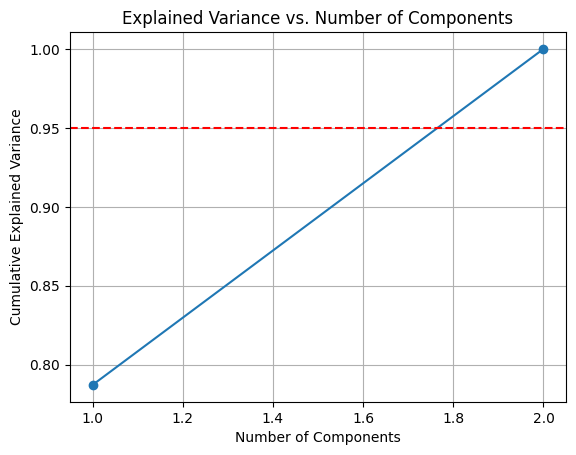

In [63]:
pca = PCA().fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid()
plt.show()